In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.preprocessing import Normalizer
from sklearn import preprocessing
from sklearn.decomposition import PCA





In [166]:
data = pd.read_csv('./weatherAUS.csv')

data.dropna(inplace=True)

In [167]:
data.info

<bound method DataFrame.info of               Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
6049    2009-01-01    Cobar     17.9     35.2       0.0         12.0   
6050    2009-01-02    Cobar     18.4     28.9       0.0         14.8   
6052    2009-01-04    Cobar     19.4     37.6       0.0         10.8   
6053    2009-01-05    Cobar     21.9     38.4       0.0         11.4   
6054    2009-01-06    Cobar     24.2     41.0       0.0         11.2   
...            ...      ...      ...      ...       ...          ...   
142298  2017-06-20   Darwin     19.3     33.4       0.0          6.0   
142299  2017-06-21   Darwin     21.2     32.6       0.0          7.6   
142300  2017-06-22   Darwin     20.7     32.8       0.0          5.6   
142301  2017-06-23   Darwin     19.5     31.8       0.0          6.2   
142302  2017-06-24   Darwin     20.2     31.7       0.0          5.6   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
6049        12.3         SSW

In [168]:
data.isnull().sum()*100/len(data)

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

<Axes: >

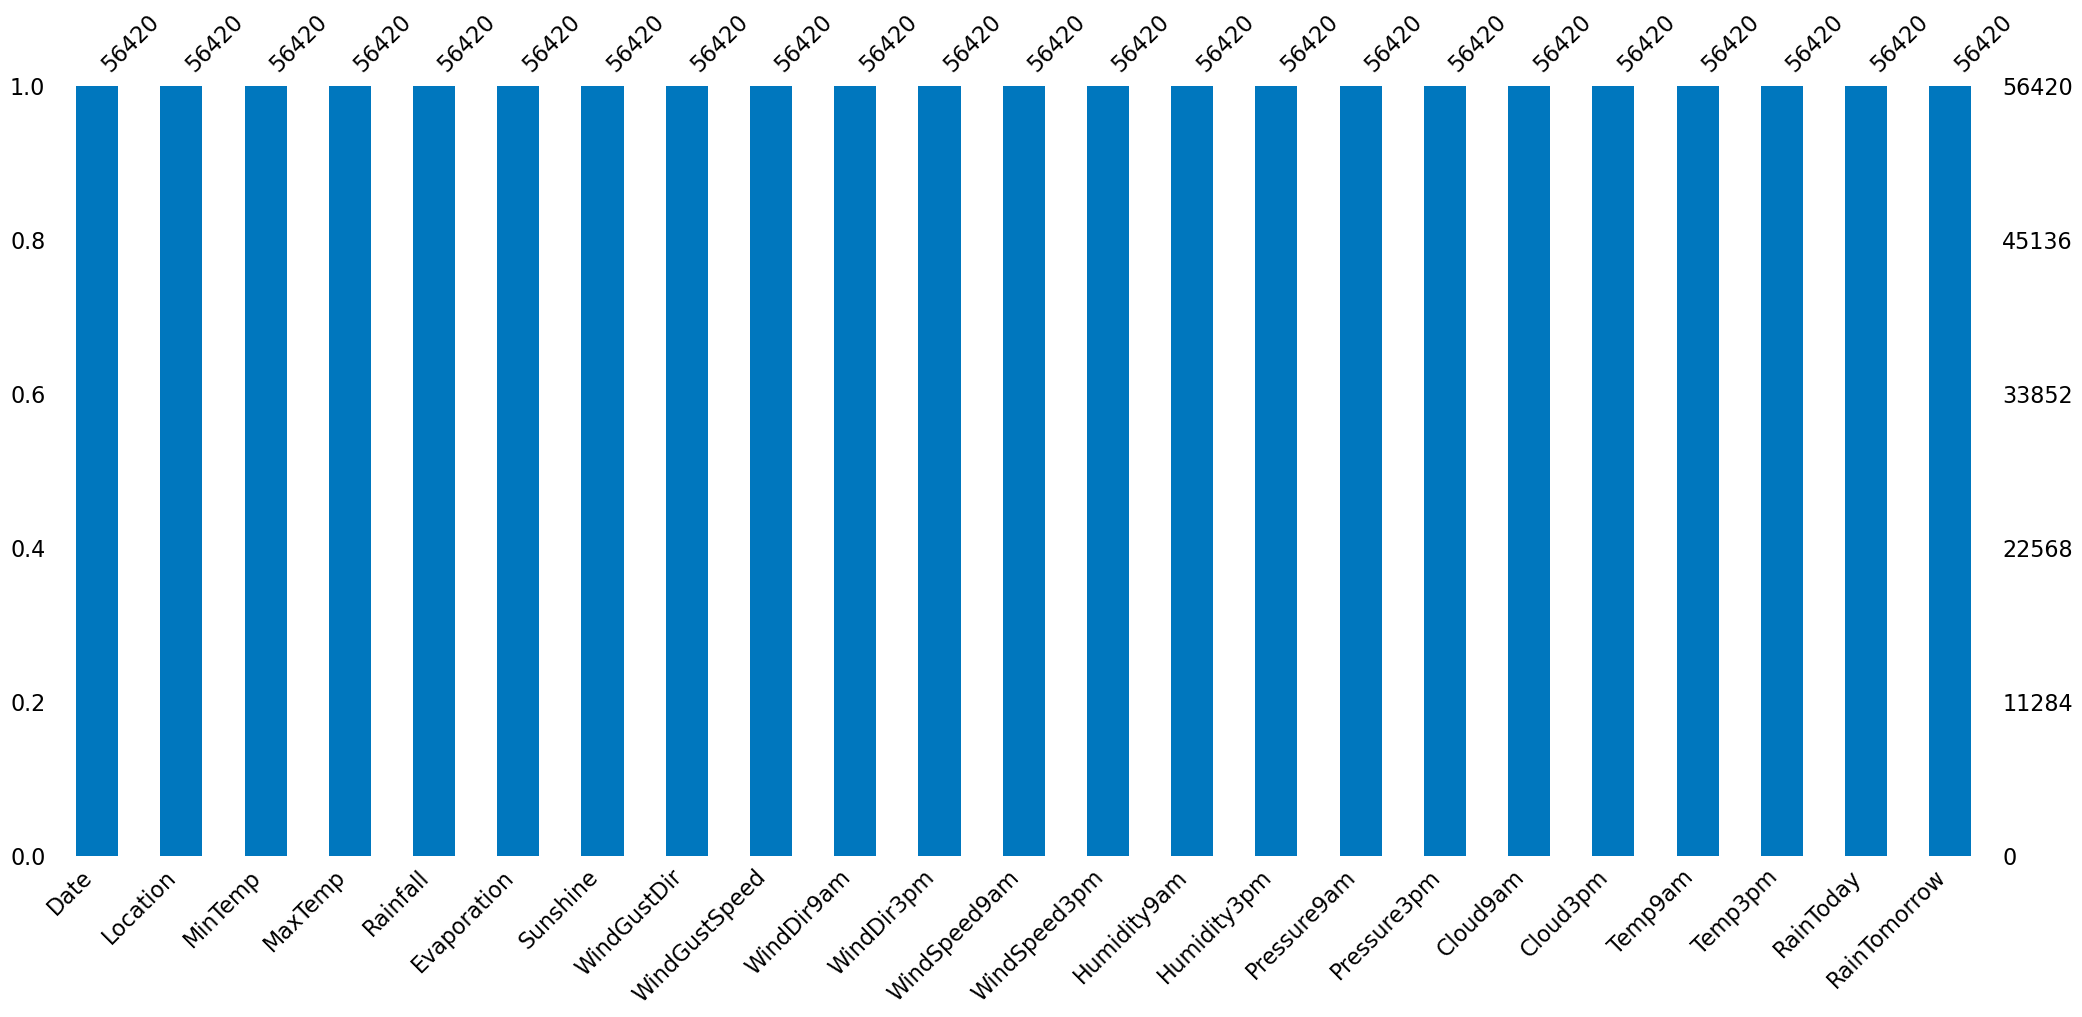

In [169]:
msno.bar(data, color="#0077be")

In [170]:
x = data[['Location','MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainToday']]
y = data['RainTomorrow']

In [171]:
print(x)
len(x)

       Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
6049      Cobar     17.9     35.2       0.0         12.0      12.3   
6050      Cobar     18.4     28.9       0.0         14.8      13.0   
6052      Cobar     19.4     37.6       0.0         10.8      10.6   
6053      Cobar     21.9     38.4       0.0         11.4      12.2   
6054      Cobar     24.2     41.0       0.0         11.2       8.4   
...         ...      ...      ...       ...          ...       ...   
142298   Darwin     19.3     33.4       0.0          6.0      11.0   
142299   Darwin     21.2     32.6       0.0          7.6       8.6   
142300   Darwin     20.7     32.8       0.0          5.6      11.0   
142301   Darwin     19.5     31.8       0.0          6.2      10.6   
142302   Darwin     20.2     31.7       0.0          5.6      10.7   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  WindSpeed3pm  \
6049           SSW           48.0        ENE         SW  ...          20.0   
605

56420

In [172]:
print(y)
len(y)

6049      No
6050      No
6052      No
6053      No
6054      No
          ..
142298    No
142299    No
142300    No
142301    No
142302    No
Name: RainTomorrow, Length: 56420, dtype: object


56420

In [173]:
print(data.dtypes)
print(len(data))

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object
56420


In [174]:
label_encoder = preprocessing.LabelEncoder()
data['WindGustDir'] = label_encoder.fit_transform(data['WindGustDir'])
data['WindDir9am'] = label_encoder.fit_transform(data['WindDir9am'])
data['WindDir3pm'] = label_encoder.fit_transform(data['WindDir3pm'])
#data['Location'] = label_encoder.fit_transform(data['Location'])
data['RainTomorrow'] = label_encoder.fit_transform(data['RainTomorrow'])
data['RainToday'] = label_encoder.fit_transform(data['RainToday'])

In [177]:
object_strng = str('SydneyAirport')
object_strng = str('Cobar')
data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir        int32
WindGustSpeed    float64
WindDir9am         int32
WindDir3pm         int32
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int32
RainTomorrow       int32
dtype: object

In [178]:
data['Location'] = data['Location'].astype(float)

ValueError: could not convert string to float: 'Cobar'

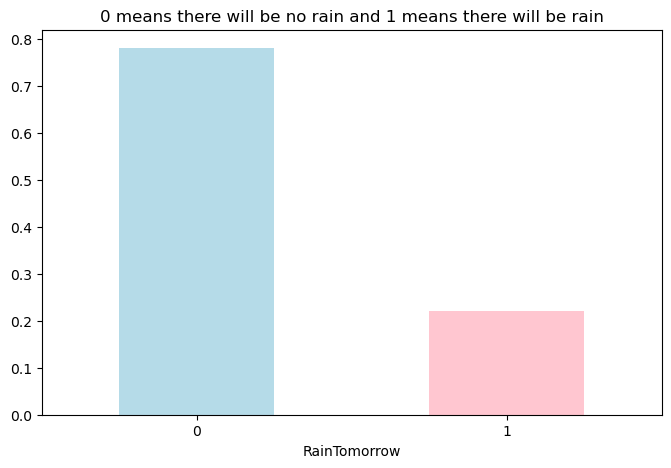

In [ ]:
fig = plt.figure(figsize = (8,5))
data.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['lightblue','pink'], alpha = 0.9, rot=0)
plt.title('Não há chuva amanha = 0, Há chuva amanhâ = 1')
plt.show()

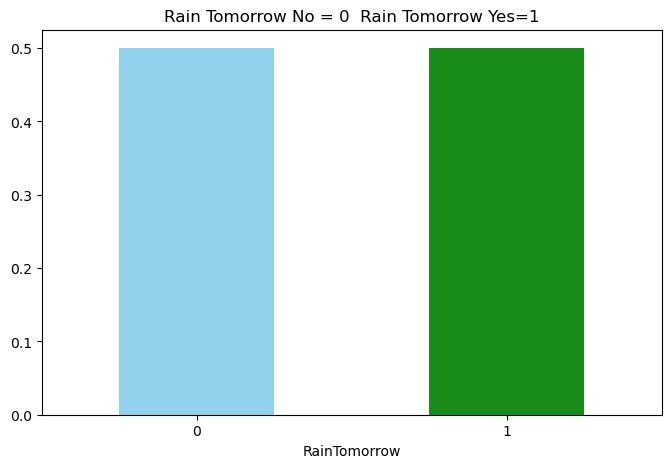

In [ ]:
no = data[data.RainTomorrow == 0]
yes = data[data.RainTomorrow == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
oversampled = pd.concat([no, yes_oversampled])

fig = plt.figure(figsize = (8,5))
oversampled.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','green'], alpha = 0.9, rot=0)
plt.title('Não há chuva amanha = 0, Há chuva amanhâ = 1')
plt.show()

In [ ]:
X = oversampled.drop([ "Date","RainTomorrow"], axis=1)
Y = oversampled["RainTomorrow"]

In [ ]:
print(X)
len(X)

        Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
6049         4.0     17.9     35.2       0.0         12.0      12.3   
6050         4.0     18.4     28.9       0.0         14.8      13.0   
6052         4.0     19.4     37.6       0.0         10.8      10.6   
6053         4.0     21.9     38.4       0.0         11.4      12.2   
6054         4.0     24.2     41.0       0.0         11.2       8.4   
...          ...      ...      ...       ...          ...       ...   
101049      12.0      4.9     13.5       1.8          0.8       1.9   
61706       18.0      2.2     11.9       0.0          2.0       0.7   
118506      16.0      8.8     24.3       0.0          0.8       8.4   
62083       18.0      9.7     12.1       2.0          1.0       0.0   
89647        2.0     23.9     28.4       2.6          2.6       0.6   

        WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  WindSpeed3pm  \
6049             11           48.0           1          12  ...   

87986

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size =0.3, stratify = Y, random_state = 0)

x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x,y, test_size =0.3, stratify = y, random_state = 0)

In [ ]:
X_train.dtypes

Location         float64
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir        int64
WindGustSpeed    float64
WindDir9am         int64
WindDir3pm         int64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int64
dtype: object

In [ ]:
y_train.dtypes

dtype('int64')

In [ ]:
print(len(X_train))
print(len(X_test))
print(len(X_train)/len(X))

61590
26396
0.6999977269110995


In [ ]:
pca = PCA(n_components=0.60)
pca.fit(X)

PCA(n_components=0.6)

In [ ]:
Z = pca.transform(X)
Z

array([[ 67.23481208,   4.9088318 ],
       [ 62.76979159,  -5.67975982],
       [ 48.55026584,   5.32746551],
       ...,
       [ 24.23320009,   5.55695966],
       [-50.4060753 ,   1.08366008],
       [-17.44025405, -13.36424392]])

In [ ]:
Z.mean(axis=0)

array([-1.03378897e-13,  2.31089315e-14])

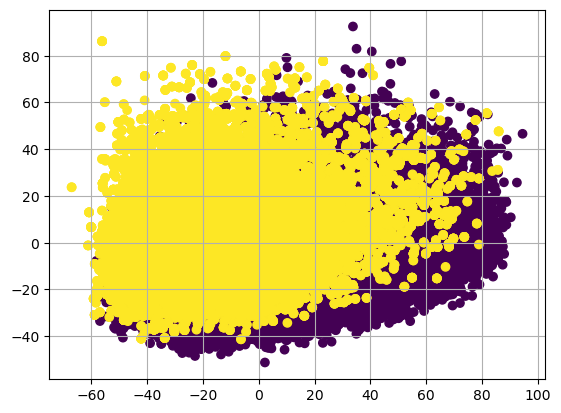

In [ ]:
plt.scatter(Z[:,0],Z[:,1],c=Y)
plt.grid()

In [ ]:
Z_train, Z_test, yz_train, yz_test = train_test_split(Z,Y, test_size =0.2, stratify = Y, random_state = 0)

In [ ]:
scaler = StandardScaler()
x_train_standard = scaler.fit_transform(X_train)
x_test_standard = scaler.transform(X_test)

scaler = StandardScaler()
x_train_standard_new = scaler.fit_transform(x_train_new)
x_test_standard_new = scaler.transform(x_test_new)

scaler = StandardScaler()
x_train_standard_z = scaler.fit_transform(Z_train)
x_test_standard_z = scaler.transform(Z_test)

ValueError: could not convert string to float: 'SydneyAirport'

In [ ]:
model_1 = LogisticRegression()
model_1.fit(x_train_standard, y_train)
y_pred_1 = model_1.predict(x_test_standard_new)
#y_pred_1 = model_1.predict(x_test_new)
#y_pred_1t = model_1.predict(x_train_standard_new)

model_2 = LinearSVC(C=2, loss = 'hinge', max_iter=10000)
model_2.fit(x_train_standard, y_train)  
y_pred_2 = model_2.predict(x_test_standard_new)
#y_pred_2 = model_2.predict(x_test_new)
#y_pred_2t = model_2.predict(x_train_standard_new)

model_3 = Pipeline((("poly_features", PolynomialFeatures(degree=3, include_bias=False)), ("log_reg", LogisticRegression(penalty=None, max_iter= 100))),).fit(x_train_standard, y_train)
y_pred_3 = model_3.predict(x_test_standard_new)
#y_pred_3 = model_3.predict(x_test_new)
#y_pred_3t = model_3.predict(x_train_standard_new)

model_4 = Pipeline((("poly_features", PolynomialFeatures(degree=3, include_bias=False)), ("poli_SVM", (LinearSVC(C=1, max_iter=50000)))),).fit(x_train_standard, y_train)
y_pred_4 = model_4.predict(x_test_standard_new)
#y_pred_4 = model_4.predict(x_test_new)
#y_pred_4t = model_4.predict(x_train_standard_new)

model_5 = Pipeline((("poly_features", PolynomialFeatures(degree=3, include_bias=False)), ("log_reg", LogisticRegression(penalty=None, max_iter= 1000))),).fit(x_train_standard_z, yz_train)
y_pred_5 = model_5.predict(x_test_standard_z)
#y_pred_5 = model_5.predict(Z_test)
#y_pred_5t = model_3.predict(x_train_standard_z)

In [ ]:
disp_1 = DecisionBoundaryDisplay.from_estimator(model_5,x_test_standard_z,response_method="predict",alpha=1)
disp_1.ax_.scatter(x_test_standard_z[yz_test==0,0],x_test_standard_z[yz_test==0,1],c='tab:purple',label="classe 0",edgecolor="k")
disp_1.ax_.scatter(x_test_standard_z[yz_test==1,0],x_test_standard_z[yz_test==1,1],c='y',label="classe 1",edgecolor="k")
disp_1.ax_.legend()
plt.xlabel("x1")
plt.ylabel("x2")
disp_1.ax_.grid()

Confusion Matrix:
[[10815  2383]
 [ 2128 11070]]
Accuracy: 82.91%


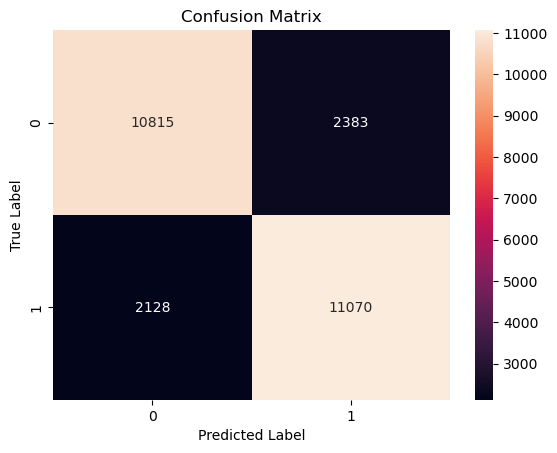

In [ ]:
cm = confusion_matrix(y_test_new, y_pred_1)
acc_reg_test = accuracy_score(y_test_new, y_pred_1)
print("Confusion Matrix:")
print(cm)
print("Accuracy: {:.2f}%".format(acc_reg_test * 100))


sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
cm = confusion_matrix(y_test_new, y_pred_2)
acc_reg_test = accuracy_score(y_test_new, y_pred_2)
print("Confusion Matrix:")
print(cm)
print("Accuracy: {:.2f}%".format(acc_reg_test * 100))


sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
cm = confusion_matrix(y_test_new, y_pred_3)
acc_reg_test = accuracy_score(y_test_new, y_pred_3)
print("Confusion Matrix:")
print(cm)
print("Accuracy: {:.2f}%".format(acc_reg_test * 100))


sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
cm = confusion_matrix(y_test_new, y_pred_4)
acc_reg_test = accuracy_score(y_test_new, y_pred_4)
print("Confusion Matrix:")
print(cm)
print("Accuracy: {:.2f}%".format(acc_reg_test * 100))


sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

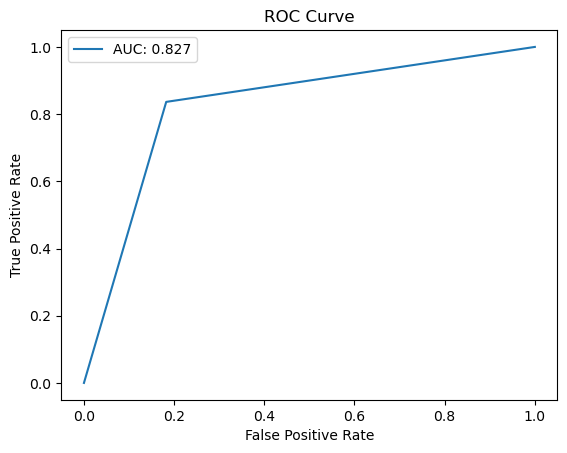

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_new, y_pred_4)
auc = roc_auc_score(y_test_new, y_pred_4)

plt.plot(fpr, tpr, label='AUC: {:.3f}'.format(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
accuracy = accuracy_score(y_test_new, y_pred_1)
#accuracy_0 = accuracy_score(y_train_new, y_pred_1)
print(f'Accuracy: {accuracy}')

# Generate a classification report
report = classification_report(y_test_new, y_pred_1)
#report_0 = classification_report(y_train_new, y_pred_1)
print(report)

Accuracy: 0.8269813608122443
              precision    recall  f1-score   support

           0       0.83      0.82      0.83     13198
           1       0.82      0.84      0.83     13198

    accuracy                           0.83     26396
   macro avg       0.83      0.83      0.83     26396
weighted avg       0.83      0.83      0.83     26396



In [ ]:
accuracy = accuracy_score(y_test_new, y_pred_2)
#accuracy_0 = accuracy_score(y_train_new, y_pred_2)
print(f'Accuracy: {accuracy}')

# Generate a classification report
report = classification_report(y_test_new, y_pred_2)
#report_0 = classification_report(y_train_new, y_pred_2)
print(report)

In [ ]:
accuracy = accuracy_score(y_test_new, y_pred_3)
#accuracy_0 = accuracy_score(y_train_new, y_pred_3)
print(f'Accuracy: {accuracy}')

# Generate a classification report
report = classification_report(y_test_new, y_pred_3)
#report_0 = classification_report(y_train_new, y_pred_3)
print(report)

In [ ]:
accuracy = accuracy_score(y_test_new, y_pred_4)
#accuracy_0 = accuracy_score(y_train_new, y_pred_4)
print(f'Accuracy: {accuracy}')

# Generate a classification report
report = classification_report(y_test_new, y_pred_4)
#report_0 = classification_report(y_train_new, y_pred_4)
print(report)